# Problem Statement: Building Stock Portfolios

Create pools of stocks that move together on one or more fundamental financial metric. In simple words, the goal is to group stocks that exhibit similar patterns or trends in one or more fundamental financial metrics.

### Steps to create stock pools
1. Gather data: Collect historical data for the financial metrics that are choosen.
2. Preprocess data: Clean and normalize the data as needed.
3. Select similarity metric: Choose a suitable metric based on the requirements.
4. Apply clustering algorithm: Use the chosen algorithm to group the stocks based on their similarity in the selected metrics.
5. Analyze and interpret the results: Examine the resulting clusters to identify stocks with similar characteristics.

### Importing the Dataset
The purpose of this dataset to get the list of companies which are stored in the "Symbol" column. Once the dataset is imported, the company symbols are stored in a list.

In [1]:
# importing packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [2]:
# configuring the notebook
pd.set_option("display.max_columns", None)
sns.set_theme(style = "whitegrid")
warnings.filterwarnings("ignore")

In [3]:
# importing dataset
df_stocks = pd.read_csv("ind_nifty50list.csv")
df_stocks.head()

,Company Name,Industry,Symbol,Series,ISIN Code
0,Adani Ports and Special Economic Zone Ltd.,SERVICES,ADANIPORTS,EQ,INE742F01042
1,Asian Paints Ltd.,CONSUMER GOODS,ASIANPAINT,EQ,INE021A01026
2,Axis Bank Ltd.,FINANCIAL SERVICES,AXISBANK,EQ,INE238A01034
3,Bajaj Auto Ltd.,AUTOMOBILE,BAJAJ-AUTO,EQ,INE917I01010
4,Bajaj Finance Ltd.,FINANCIAL SERVICES,BAJFINANCE,EQ,INE296A01024


In [4]:
# storing the symbols in a list
symbols_list = list(df_stocks["Symbol"])
symbols_list

['ADANIPORTS',
 'ASIANPAINT',
 'AXISBANK',
 'BAJAJ-AUTO',
 'BAJFINANCE',
 'BAJAJFINSV',
 'BPCL',
 'BHARTIARTL',
 'BRITANNIA',
 'CIPLA',
 'COALINDIA',
 'DIVISLAB',
 'DRREDDY',
 'EICHERMOT',
 'GRASIM',
 'HCLTECH',
 'HDFCBANK',
 'HDFCLIFE',
 'HEROMOTOCO',
 'HINDALCO',
 'HINDUNILVR',
 'HDFC',
 'ICICIBANK',
 'ITC',
 'IOC',
 'INDUSINDBK',
 'INFY',
 'JSWSTEEL',
 'KOTAKBANK',
 'LT',
 'M&M',
 'MARUTI',
 'NTPC',
 'NESTLEIND',
 'ONGC',
 'POWERGRID',
 'RELIANCE',
 'SBILIFE',
 'SHREECEM',
 'SBIN',
 'SUNPHARMA',
 'TCS',
 'TATACONSUM',
 'TATAMOTORS',
 'TATASTEEL',
 'TECHM',
 'TITAN',
 'UPL',
 'ULTRACEMCO',
 'WIPRO']

Once the symbols are extracted into a list, a `.NS` is concatenated at the end of every symbol to fetch the data from Yahoo Finance.

In [5]:
yf_symbols = list(map(lambda x: x + ".NS", symbols_list))
yf_symbols

['ADANIPORTS.NS',
 'ASIANPAINT.NS',
 'AXISBANK.NS',
 'BAJAJ-AUTO.NS',
 'BAJFINANCE.NS',
 'BAJAJFINSV.NS',
 'BPCL.NS',
 'BHARTIARTL.NS',
 'BRITANNIA.NS',
 'CIPLA.NS',
 'COALINDIA.NS',
 'DIVISLAB.NS',
 'DRREDDY.NS',
 'EICHERMOT.NS',
 'GRASIM.NS',
 'HCLTECH.NS',
 'HDFCBANK.NS',
 'HDFCLIFE.NS',
 'HEROMOTOCO.NS',
 'HINDALCO.NS',
 'HINDUNILVR.NS',
 'HDFC.NS',
 'ICICIBANK.NS',
 'ITC.NS',
 'IOC.NS',
 'INDUSINDBK.NS',
 'INFY.NS',
 'JSWSTEEL.NS',
 'KOTAKBANK.NS',
 'LT.NS',
 'M&M.NS',
 'MARUTI.NS',
 'NTPC.NS',
 'NESTLEIND.NS',
 'ONGC.NS',
 'POWERGRID.NS',
 'RELIANCE.NS',
 'SBILIFE.NS',
 'SHREECEM.NS',
 'SBIN.NS',
 'SUNPHARMA.NS',
 'TCS.NS',
 'TATACONSUM.NS',
 'TATAMOTORS.NS',
 'TATASTEEL.NS',
 'TECHM.NS',
 'TITAN.NS',
 'UPL.NS',
 'ULTRACEMCO.NS',
 'WIPRO.NS']

Defining a few variable/ financial metrics, and fetching the corresponding data from `yfinance` for the companies in the list.

In [6]:
import yfinance as yf

stock_financials = {
    "marketCap": [],
    "regularMarketVolume": [],
    "earningsQuarterlyGrowth": [],
    "bookValue": [],
    "totalRevenue": [],
    "returnOnAssets": [],
    "profitMargins": [],
    "earningsGrowth": []
}

for ticker in yf_symbols:
    stock_info = yf.Ticker(ticker).info
    stock_financials["marketCap"].append(stock_info.get("marketCap", None))
    stock_financials["regularMarketVolume"].append(stock_info.get("regularMarketVolume", None))
    stock_financials["earningsQuarterlyGrowth"].append(stock_info.get("earningsQuarterlyGrowth", None))
    stock_financials["bookValue"].append(stock_info.get("bookValue", None))
    stock_financials["totalRevenue"].append(stock_info.get("totalRevenue", None))
    stock_financials["returnOnAssets"].append(stock_info.get("returnOnAssets", None))
    stock_financials["profitMargins"].append(stock_info.get("profitMargins", None))
    stock_financials["earningsGrowth"].append(stock_info.get("earningsGrowth", None))

In [7]:
df = pd.DataFrame(stock_financials)
df.head()

,marketCap,regularMarketVolume,earningsQuarterlyGrowth,bookValue,totalRevenue,returnOnAssets,profitMargins,earningsGrowth
0,3.139548e+12,1542524.0,0.472,244.328,2.741933e+11,NaN,0.33220,0.472
1,3.159535e+12,928902.0,-0.245,195.250,3.522494e+11,NaN,0.14421,-0.246
2,3.671238e+12,8723705.0,0.057,534.043,6.497045e+11,0.01887,0.41144,0.050
3,3.075449e+12,466877.0,0.181,1037.411,4.776608e+11,NaN,0.16761,0.198
4,4.479012e+12,1308786.0,0.138,1241.009,3.295906e+11,NaN,0.45287,0.115


In [8]:
df.shape

(50, 8)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   marketCap                49 non-null     float64
 1   regularMarketVolume      49 non-null     float64
 2   earningsQuarterlyGrowth  48 non-null     float64
 3   bookValue                49 non-null     float64
 4   totalRevenue             49 non-null     float64
 5   returnOnAssets           11 non-null     float64
 6   profitMargins            49 non-null     float64
 7   earningsGrowth           47 non-null     float64
dtypes: float64(8)
memory usage: 3.3 KB


### Downloading Adjusted Closing Price (Adj Close)
It is a stock price that has been adjusted to reflect the effects of corporate actions such as stock splits, dividends, and rights offerings. It provides a more accurate representation of stock's historical performance by accounting for factors that can artifically inflate or deflate the closing price.

In [10]:
stock_prices = yf.download(yf_symbols, start = "2020-01-01")["Adj Close"]
stock_prices.columns = symbols_list

[*********************100%***********************]  50 of 50 completed

1 Failed download:
['HDFC.NS']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')


In [11]:
stock_prices.shape

(1162, 50)

In [12]:
stock_prices.tail()

,ADANIPORTS,ASIANPAINT,AXISBANK,BAJAJ-AUTO,BAJFINANCE,BAJAJFINSV,BPCL,BHARTIARTL,BRITANNIA,CIPLA,COALINDIA,DIVISLAB,DRREDDY,EICHERMOT,GRASIM,HCLTECH,HDFCBANK,HDFCLIFE,HEROMOTOCO,HINDALCO,HINDUNILVR,HDFC,ICICIBANK,ITC,IOC,INDUSINDBK,INFY,JSWSTEEL,KOTAKBANK,LT,M&M,MARUTI,NTPC,NESTLEIND,ONGC,POWERGRID,RELIANCE,SBILIFE,SHREECEM,SBIN,SUNPHARMA,TCS,TATACONSUM,TATAMOTORS,TATASTEEL,TECHM,TITAN,UPL,ULTRACEMCO,WIPRO
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2024-09-04 00:00:00+00:00,1472.099976,3231.649902,1177.699951,10963.700195,1871.900024,7299.500000,1561.900024,357.250000,5926.549805,1651.900024,503.649994,5096.600098,6787.200195,4833.549805,2757.649902,1785.250000,NaN,1641.800049,758.799988,5683.750000,666.799988,2841.250000,1236.349976,1434.400024,1922.449951,177.029999,506.350006,933.049988,1783.800049,3650.800049,2749.600098,12336.250000,2534.750000,405.100006,314.399994,332.899994,3029.100098,1912.199951,816.500000,25770.750000,1832.849976,1194.949951,1080.449951,151.179993,4479.250000,1645.300049,3607.699951,11580.450195,607.849976,519.150024
2024-09-05 00:00:00+00:00,1465.550049,3238.250000,1180.550049,10855.750000,1864.949951,7244.899902,1547.199951,360.700012,5850.000000,1627.750000,497.000000,5120.899902,6695.750000,4800.100098,2741.600098,1790.550049,NaN,1645.449951,751.849976,5734.200195,669.950012,2838.449951,1235.949951,1422.900024,1933.150024,181.339996,511.200012,925.450012,1777.949951,3624.149902,2723.100098,12298.599609,2504.899902,403.250000,311.399994,331.250000,2985.949951,1907.849976,818.750000,25662.250000,1826.500000,1188.650024,1069.150024,151.720001,4475.950195,1639.500000,3722.850098,11542.650391,618.700012,524.849976
2024-09-06 00:00:00+00:00,1442.400024,3273.699951,1158.750000,10830.099609,1857.150024,7317.149902,1539.250000,352.149994,5843.549805,1611.050049,488.549988,5137.799805,6667.149902,4752.500000,2692.850098,1756.099976,NaN,1636.949951,738.400024,5743.750000,667.099976,2838.949951,1208.150024,1409.349976,1901.849976,176.639999,501.700012,932.799988,1764.150024,3574.750000,2698.100098,12186.150391,2503.199951,394.799988,308.799988,329.799988,2929.649902,1896.300049,782.500000,25610.449219,1824.550049,1173.849976,1049.349976,151.220001,4456.750000,1623.250000,3695.500000,11432.849609,609.799988,520.599976
2024-09-09 00:00:00+00:00,1435.900024,3280.750000,1170.849976,10847.599609,1860.449951,7347.450195,1542.650024,347.799988,5939.450195,1620.150024,484.450012,5173.500000,6655.899902,4747.350098,2710.350098,1746.750000,NaN,1646.500000,735.799988,5745.299805,658.549988,2921.800049,1235.000000,1428.099976,1894.650024,175.339996,511.750000,934.250000,1790.150024,3578.300049,2708.850098,12145.750000,2516.750000,389.850006,298.899994,328.549988,2924.899902,1901.750000,784.250000,25798.599609,1821.849976,1192.050049,1038.699951,149.470001,4449.549805,1579.199951,3684.550049,11494.349609,604.400024,514.849976
2024-09-10 00:00:00+00:00,1453.400024,3295.050049,1187.199951,10987.750000,1824.500000,7241.850098,1577.849976,345.950012,5969.899902,1632.000000,491.100006,5426.450195,6650.399902,4737.200195,2702.550049,1779.099976,NaN,1650.349976,702.900024,5669.700195,659.500000,2898.600098,1237.300049,1435.550049,1912.300049,175.550003,513.599976,938.750000,1791.599976,3596.149902,2690.000000,12263.400391,2535.500000,396.299988,295.600006,334.149994,2923.050049,1853.449951,782.650024,25725.150391,1836.349976,1204.150024,1035.800049,149.419998,4507.850098,1607.400024,3727.399902,11541.049805,619.200012,525.750000


In [13]:
# extracting stock_prices only from the year 2020
prices_2020 = stock_prices.loc["2020-01-01 00:00:00": "2020-12-31 00:00:00"]

# Calculating the percentage growth of the stock price from 2020-01-02 to 2020-08-04
stock_prices.loc["returns_2020"] = (prices_2020.loc["2020-08-04 00:00:00"])/ (prices_2020.loc["2020-01-02 00:00:00"] - 1) * 100
stock_prices

,ADANIPORTS,ASIANPAINT,AXISBANK,BAJAJ-AUTO,BAJFINANCE,BAJAJFINSV,BPCL,BHARTIARTL,BRITANNIA,CIPLA,COALINDIA,DIVISLAB,DRREDDY,EICHERMOT,GRASIM,HCLTECH,HDFCBANK,HDFCLIFE,HEROMOTOCO,HINDALCO,HINDUNILVR,HDFC,ICICIBANK,ITC,IOC,INDUSINDBK,INFY,JSWSTEEL,KOTAKBANK,LT,M&M,MARUTI,NTPC,NESTLEIND,ONGC,POWERGRID,RELIANCE,SBILIFE,SHREECEM,SBIN,SUNPHARMA,TCS,TATACONSUM,TATAMOTORS,TATASTEEL,TECHM,TITAN,UPL,ULTRACEMCO,WIPRO
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-01-01 00:00:00+00:00,364.348297,1726.790894,745.452026,2703.129150,935.670654,4160.838867,436.938965,185.158875,2751.210693,458.291168,131.486267,1745.139404,2790.024658,2115.296143,723.675903,486.583801,NaN,1227.428589,613.773560,2144.510254,207.269104,1802.972290,518.854065,1433.394531,668.733765,56.667076,194.749023,249.207764,1669.007446,1203.410034,508.507751,7020.507324,1403.387207,93.288528,94.034660,82.488075,1356.042847,967.813660,314.799225,19948.822266,412.528473,311.602081,183.311218,18.817575,1984.880981,655.840759,1128.044434,3967.757568,556.150879,242.605301
2020-01-02 00:00:00+00:00,369.654602,1724.335327,753.666199,2678.157959,948.356140,4175.342285,438.770386,183.614761,2763.655762,455.979919,130.958939,1751.903687,2775.974854,2069.786621,746.921265,487.945068,NaN,1235.252563,626.415405,2141.777100,212.927155,1804.368530,522.575623,1476.561523,666.782410,57.139484,196.180420,256.969360,1666.514893,1235.885376,511.587585,7037.935059,1398.667847,93.173401,94.477364,82.319305,1379.128540,960.825562,319.364166,20844.416016,413.145874,311.121002,192.553802,19.505510,1975.769287,659.240112,1128.874878,4143.256348,562.957886,243.192947
2020-01-03 00:00:00+00:00,369.027466,1686.539062,739.726929,2636.153564,932.418274,4123.619141,438.674011,182.089523,2750.441406,452.561310,131.424225,1760.443237,2794.385010,2030.347168,737.467163,497.728699,NaN,1217.636841,622.909363,2144.333984,209.348541,1794.500000,520.884033,1476.416748,677.037842,57.072006,195.076202,253.251236,1652.108398,1226.468750,504.859436,6965.345215,1385.777344,91.600052,94.772476,81.433250,1380.790527,966.525085,314.093262,20736.519531,422.312164,306.165802,189.920181,19.459244,2015.145142,667.028198,1113.342407,4118.269043,558.514343,245.935379
2020-01-06 00:00:00+00:00,366.808502,1643.927490,720.112427,2606.634521,902.173523,3930.145508,433.420685,176.685226,2735.281006,449.479706,127.608978,1763.849243,2789.492188,1998.841675,718.315308,495.133728,NaN,1191.285278,611.896973,2087.735596,202.433136,1783.327515,508.172455,1419.005615,670.548828,56.194668,192.295258,245.629074,1647.572144,1209.657227,497.041290,6761.932129,1368.974365,91.254684,93.149277,81.475426,1348.766724,974.454773,300.256927,20679.728516,417.895264,300.296448,184.503815,19.038841,2014.961914,662.983582,1131.805298,4057.654541,553.030823,246.963776
2020-01-07 00:00:00+00:00,371.246460,1660.538818,722.601562,2606.892090,907.456116,3940.912598,429.034912,173.615845,2748.450195,451.261261,127.608978,1769.174438,2794.676025,1993.413574,723.480896,497.048065,NaN,1210.148926,622.168579,2070.015625,201.997925,1788.215454,505.465851,1411.521484,660.611145,56.037189,192.499756,246.558594,1665.817017,1213.102173,499.078705,6791.889648,1357.019165,92.521049,92.780373,80.884727,1369.516968,976.238953,299.692169,21562.060547,424.021942,302.990570,183.559677,19.153496,2019.906494,668.749390,1133.124146,4140.620605,562.579651,249.951050
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-09-05 00:00:00+00:00,1465.550049,3238.250000,1180.550049,10855.750000,1864.949951,7244.899902,1547.199951,360.700012,5850.000000,1627.750000,497.000000,5120.899902,6695.750000,4800.100098,2741.600098,1790.550049,NaN,1645.449951,751.849976,5734.200195,669.950012,2838.449951,1235.949951,1422.900024,1933.150024,181.339996,511.200012,925.450012,1777.949951,3624.149902,2723.100098,12298.599609,2504.8999

In [14]:
stock_prices = stock_prices.T
stock_prices.head()

Date        2020-01-01 00:00:00+00:00  2020-01-02 00:00:00+00:00  \
ADANIPORTS                 364.348297                 369.654602   
ASIANPAINT                1726.790894                1724.335327   
AXISBANK                   745.452026                 753.666199   
BAJAJ-AUTO                2703.129150                2678.157959   
BAJFINANCE                 935.670654                 948.356140   

Date        2020-01-03 00:00:00+00:00  2020-01-06 00:00:00+00:00  \
ADANIPORTS                 369.027466                 366.808502   
ASIANPAINT                1686.539062                1643.927490   
AXISBANK                   739.726929                 720.112427   
BAJAJ-AUTO                2636.153564                2606.634521   
BAJFINANCE                 932.418274                 902.173523   

Date        2020-01-07 00:00:00+00:00  2020-01-08 00:00:00+00:00  \
ADANIPORTS                 371.246460                 372.066559   
ASIANPAINT                1660.538818                1664.776001   
AXISBANK                   722.601562                 721.356995   
BAJAJ-AUTO                2606.892090                2625.169678   
BAJFINANCE                 907.456116                 912.429626   

Date        2020-01-09 00:00:00+00:00  2020-01-10 00:00:00+00:00  \
ADANIPORTS                 377.999908                 378.241119   
ASIANPAINT                1706.905518                1726.165039   
AXISBANK                   739.627380                 736.839539   
BAJAJ-AUTO                2647.866455                2661.167236   
BAJFINANCE                 937.346741                 935.052002   

Date        2020-01-13 00:00:00+00:00  2020-01-14 00:00:00+00:00  \
ADANIPORTS                 376.600983                 375.491486   
ASIANPAINT                1738.057739                1751.779907   
AXISBANK                   734.201050                 744.655457   
BAJAJ-AUTO                2655.031982                2661.510498   
BAJFINANCE                 943.332764                 953.269714   

Date        2020-01-15 00:00:00+00:00  2020-01-16 00:00:00+00:00  \
ADANIPORTS                 377.035126                 377.179871   
ASIANPAINT                1774.024536                1767.187378   
AXISBANK                   743.062439                 734.101501   
BAJAJ-AUTO                2680.345947                2670.520752   
BAJFINANCE                 956.691772                 959.984070   

Date        2020-01-17 00:00:00+00:00  2020-01-20 00:00:00+00:00  \
ADANIPORTS                 373.947845                 366.663757   
ASIANPAINT                1762.276367                1780.283691   
AXISBANK                   736.690186                 724.045288   
BAJAJ-AUTO                2675.669434                2663.312744   
BAJFINANCE                 969.247498                 955.055603   

Date        2020-01-21 00:00:00+00:00  2020-01-22 00:00:00+00:00  \
ADANIPORTS                 366.567291                 370.088745   
ASIANPAINT                1743.690674                1713.357666   
AXISBANK                   714.486938                 709.508545   
BAJAJ-AUTO                2657.606445                2639.886230   
BAJFINANCE                 951.219482                 952.536438   

Date        2020-01-23 00:00:00+00:00  2020-01-24 00:00:00+00:00  \
ADANIPORTS                 372.259460                 371.198242   
ASIANPAINT                1710.324219                1720.628052   
AXISBANK                   719.863464                 734.201050   
BAJAJ-AUTO                2630.275391                2637.955322   
BAJFINANCE                 951.209473                 961.141418   

Date        2020-01-27 00:00:00+00:00  2020-01-28 00:00:00+00:00  \
ADANIPORTS                 367.821503                 359.813843   
ASIANPAINT                1722.120483                1713.213135   
AXISBANK                   737.038635                 733.952087   
BAJAJ-AUTO                2645.206543          

In [15]:
# putting the data together
prices = stock_prices.iloc[:, -1]
df.index = stock_prices.index
df["returns_2020"] = prices
df.head()

,marketCap,regularMarketVolume,earningsQuarterlyGrowth,bookValue,totalRevenue,returnOnAssets,profitMargins,earningsGrowth,returns_2020
ADANIPORTS,3.139548e+12,1542524.0,0.472,244.328,2.741933e+11,NaN,0.33220,0.472,83.334059
ASIANPAINT,3.159535e+12,928902.0,-0.245,195.250,3.522494e+11,NaN,0.14421,-0.246,96.242092
AXISBANK,3.671238e+12,8723705.0,0.057,534.043,6.497045e+11,0.01887,0.41144,0.050,56.769956
BAJAJ-AUTO,3.075449e+12,466877.0,0.181,1037.411,4.776608e+11,NaN,0.16761,0.198,99.470683
BAJFINANCE,4.479012e+12,1308786.0,0.138,1241.009,3.295906e+11,NaN,0.45287,0.115,64.929794


In [16]:
# checking for null values
df.isna().sum()

marketCap                   1
regularMarketVolume         1
earningsQuarterlyGrowth     2
bookValue                   1
totalRevenue                1
returnOnAssets             39
profitMargins               1
earningsGrowth              3
returns_2020                1
dtype: int64

In [17]:
df["returnOnAssets"] = df["returnOnAssets"].replace(np.nan, 0)

In [18]:
df.dropna(axis = 0, inplace = True)
df.shape

(46, 9)

In [19]:
df.head()

,marketCap,regularMarketVolume,earningsQuarterlyGrowth,bookValue,totalRevenue,returnOnAssets,profitMargins,earningsGrowth,returns_2020
ADANIPORTS,3.139548e+12,1542524.0,0.472,244.328,2.741933e+11,0.00000,0.33220,0.472,83.334059
ASIANPAINT,3.159535e+12,928902.0,-0.245,195.250,3.522494e+11,0.00000,0.14421,-0.246,96.242092
AXISBANK,3.671238e+12,8723705.0,0.057,534.043,6.497045e+11,0.01887,0.41144,0.050,56.769956
BAJAJ-AUTO,3.075449e+12,466877.0,0.181,1037.411,4.776608e+11,0.00000,0.16761,0.198,99.470683
BAJFINANCE,4.479012e+12,1308786.0,0.138,1241.009,3.295906e+11,0.00000,0.45287,0.115,64.929794


In [20]:
# scaling the data using StandardScaler()
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x = scaler.fit_transform(df)
df_scaled = pd.DataFrame(x, columns = df.columns, index = df.index)
df_scaled

,marketCap,regularMarketVolume,earningsQuarterlyGrowth,bookValue,totalRevenue,returnOnAssets,profitMargins,earningsGrowth,returns_2020
ADANIPORTS,-0.211408,-0.511335,0.997906,-0.391633,-0.603924,-0.367678,1.642563,1.028220,-0.411864
ASIANPAINT,-0.205956,-0.595436,-0.910311,-0.443385,-0.563621,-0.367678,-0.067848,-0.923844,0.045111
AXISBANK,-0.066361,0.472895,-0.106571,-0.086132,-0.410034,0.020410,2.363521,-0.119093,-1.352296
BAJAJ-AUTO,-0.228895,-0.658760,0.223441,0.444664,-0.498867,-0.367678,0.145054,0.283282,0.159411
BAJFINANCE,0.154002,-0.543370,0.109001,0.659356,-0.575321,-0.367678,2.740468,0.057626,-1.063419
BAJAJFINSV,-0.274675,-0.427327,0.007868,-0.250210,-0.140762,-0.367678,-0.731851,0.014126,-0.657486
BPCL,-0.664657,0.392427,-2.209070,-0.465441,1.580219,-0.367678,-0.994977,-2.250595,0.917416
BHARTIARTL,1.505665,0.121949,3.946727,-0.496120,0.034419,0.734682,-0.776706,3.828536,-0.215925
BRITANNIA,-0.675608,-0.676449,0.021175,-0.476719,-0.657941,-0.367678,-0.206053,0.030438,1.114857
CIPLA,-0.708349,-0.551686,0.228764,-0.300466,-0.611809,-0.367678,0.132317,0.239782,2.000810


Clustering algorithm can now be applied to this data.

# Hierarchical Clustering
Hierarchical clustering is an unsupervised learning technique that creates a hierarchy of clusters, unlike K-Means which requires specifying the number of clusters upfornt. It tackles the challenge of finding the optimal number of clusters by building a nested structure that reveals how data points are grouped at different levels of granularity.

### How is hierarchical clustering better?
- No predefined K: Unlike K-Means, hierarchical clustering does not require need the number of clusters (K) to be specified beforehand. It iteratvely merges or splits data points, that allows in exploring the data structure and identify the natural groupings at various levels of similarity.
- Dendrogram visualization: The key output of hierarchical clustering is dendrogram, a tree like structure that depicts how data points are merged or split into clusters. The length of the branches connecting clusters represents the similarity between them. Shorter branches indicate higher similarity.

### Types of hierarchical clustering
1. Agglomerative (bottom-up approach)
2. Divisive (top-down approach)

# Agglomerative Clustering
This is the more common hierarchical clustering approach of the both. It starts with each data point as a separate cluster and iteratively merges the most similar clusters based on a distance metric (e.g. Euclidean diatance). This process continues until all the data points belong to a single cluster. The dendrogram shows these merging steps. The optimum number of clusters can be decided by cutting the dendrogram at a specific level based on the desired similarity within clusters.

In [21]:
from IPython.display import Image
Image(url='https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/015/038/original/hierarch.gif?1663699414')

# Divisive Clustering
It starts with all the data points in one big cluster and then the algorithm recursively divides this cluster into smaller and smaller sub-clusters based on a distance metric. This process continues until each data point is its own individual cluster.

# Additional Considerations

### Choosing the Right Approach
- Agglomerative clustering is generally preferred due to its intuitive bottom-up approach and the valuable insights provided by the dendrogram.
- Divisive clustering might be considered in specific scenarios, but it is less common due to the potential for creating unbalanced clusters during the splitting process.

### Benefits of Hierarchical Clustering
- Flexibility: It does not require predefining the number of clusters, hence the data structure can be explored to identify the natural grouping.
- Dendrogram Visualization: The dendrogram provides valuable insights into the relationships between clusters and helps determine the optimal number of clusters for your analysis.
- Versatility: It can work with various distance metrics and data types.

### Computational Cost
Hierarchical clustering can be computationally expensive for large datasets, especially with agglomerative clustering due to the numerous distance calculations required during merging.

### Interpretation
Determining the optimal number of clusters from the dendrogram can be subjective and required domain knowledge or additional cluster evaluation metrics.

# Proximity Matirx
Proximity simply refers to how close things are. In clustering, it translates to how similar or dissimilar data points are based on a chosen distance metric.

### What is proximity matrix?
- The proximity matrix is a square matrix with dimensions `nxn`, where n is the number of data points in the dataset.
- Each cell (i, j) of the matrix represents the distance (similarity) between data point `i` and data point `j`.
- The diagonal of the matrix `(i, i)` will always be zero, as a point is zero distance from itself.
- The matrix is symmetric, meaning the distance between point i and point j is the same as the distance between point j and point i (distance(i, j) == distance(j, i)).

For data point x_1, x_2, x_3, x_4, x_5, and x_6, the proximity matrix will look as follows,

|     | x_1 | x_2 | x_3 | x_4 | x_5 | x_6 |
|:---:|:---:|:---:|:---:|:---:|:---:|:---:|
| x_1 |  0  |     |     |     |     |     |
| x_2 |     |  0  |     |     |     |     |
| x_3 |     |     |  0  | 0.68|     |     |
| x_4 |     |     |     |  0  |     |     |
| x_5 |     |     |     |     |  0  |     |
| x_6 |     |     |     |     |     |  0  |

- Proximity matrix helps to easily identify the closest data points based on their distances.
- In agglomerative clustering, this information is crucial for deciding which clusters to merge first.

### Algorithm
- Find the minimum distance: The proximity matrix is scanned to find the pair of data points with the smalles distance (most similar).
- Merge the closest: These 2 data points are merged into a cluster.
- Update the matrix: The proximity matrix is updated to reflect the newly formed cluster. The distance between the new cluster and all the other remaining data points are calculated.
- Repeat: This process of finding the minimum distance, merging clusters, and updating the matrix continues until all the data points belong to a single cluster.

### Choosing the distance metric
The distance metric used to calculate distance in proximity matrix plays a significant role. Common choices include:
- Euclidean distance
- Manhattan distance
- Cosine distance

The appropriate metric depends on the nature of the data and the type of relationship that is being captured.

### Methods for cluster point distance
When merging clusters, there are different ways to calculate the distance between a new cluster (formed by merging 2 clusters) and the remaining data points,
- Minimum distance: This considers the closest individual point within the merged cluster to the data point.
- Maximum distance: This considers the farthest individual point within the merged cluster to the data point.
- Mean distance: This calculates the average distance between all points in the merged cluster and the data point.
- Cluster center distance: This calculates the distance between the centroid (average point) of the merged cluster and the data point.

The choice of method can influence the clustering results and may depend on the specific clustering algorithm.

# Defining Inter-Cluster Similarity (Linkage Criteria)
Linkage criteria also know as distance metrics for inter-cluster similarity, define how the distance between newly formed cluster and the remaining data points is calculated.

The popular choices are,
1. Minimum Distance (Single Linkage):
    - This method considers the closest individual point within the merged cluster to the data point.
    - It creates clusters that are like chains, potentially leading to elongated clusters.
    - Imaging a cluster with a long tail. The minimum distance might connect this tail to another cluster even if the overall structures are different.
2. Maximum Distance (Complete Linkage):
    - This method consideres the farthest individual point within the merged cluster to the data point.
    - It creates more spherical or compact clusters.
    - This approach ensures that all the data points within the merged cluster are relatively close to at least one point in the other cluster before merging.
3. Average Distance (Group Average):
    - This method calculates the average distance between all points in the merged cluster and the data point.
    - It creates a balance between single and complete linkage, often leading to more globular clusters.
4. Centroid Distance:
    - This method calculates the distance between the centroid of the merged cluster and the data point.
    - It assumes a spherical shape for the cluster and is computationally efficient.

### Choosing the correct linkage criteria
The best linkage criteria depends on the data and the type of clusters that are expected.
- Single linkage: Useful for identifying elongated or chain like clusters.
- Complete linkage: Food for compact, shperical clusters.
- Average linkage: Offers a balance between the 2 extremes.
- Centroid distance: Efficient for large datasets and assumes spherical clusters.
- Domain-specific metrics: Leverage domain knowledge to define more meaningful distance metrics. For example, gene-transfusion analysis might consider a domain-specific distance metric that incorporated factors beyond Euclidean or Manhattan distances.

# Ward's Distance
Ward's distance is a linkage criterion in hierarchical clustering. It does not directly calculate the distances but focuses on minimizing the within-cluster variance during the merging process. Ward's method aims to,
- merge clusters that lead to the smallest increase in the total variance within the newly formed cluster.
- It achieves this by analyzing the squared error between points in different clusters.

Ward's distance is mathematically expressed as,

$\sum x_i \in C_1 \sum x_j \in C_2 \frac{(distance(x_i, x_j)^2)}{|C_1| |C_2|}$

Where,
- $C_1$, $C_2$ = Number of data points in clusters $C_1$ and $C_2$ respectively.

### Normalization for fairness
- The numerator ($\sum distance(x_i, x_j)^2)$) simply sums the squared distances between all possible point pairs across the two clusters.
- Dividing this sum by the product of cardinalities $(|C_1| * |C_2|)$ normalizes the value.
- This normalization ensures that clusters with different sizes are compared fairly. Imagine a large cluster merging with a small one. Without normalization, the large cluster's distances would dominate, potentially leading to biased merging decisions.

### Impact on clustering
- Ward's distance tends to create more spherical and compact clusters by minimizing the overall variance within each cluster.
- It avoids elongated clusters that can occur with single linkage and ensures that merged clusters have a higher degree of internal similarity.

### Comparison with euclidean distance
Ward's distance differs from euclidean distance in a few key ways,
- Euclidean distance: Calculates the straight line distance between 2 data points. $Euclidean = \sqrt{(x_2 - x_1)^2 + (y_2 - y_1)^2}$
- Ward's distance: Considers the overall spread of points within each cluster when evaluating potential mergers. $Ward = \frac{(x_2 - x_1)^2 + (y_2 - y_1)^2}{|C_1||C_2|}$

# Linkage Criteria in Agglomerative Clustering
The choice of linkage criteria (min, max, cluster center, ward's distance) in agglomerative clustering significantly impacts the resulting clusters, and the optimal choice depends on the data and the desired outcome. The following is a breakdown of how each metric affects the model,
1. Minimum Distance (Single Linkage):
    - Effect: Creates elongated, chain-like clusters. Merges clusters based on the closest data point in each cluster, even if the overall structures are dissimilar.
    - Suitable for: Identifying data points with a sequential or ordered relationship.
    - Drawbacks: Can be sensitive to outliers and lead to noisy clusters.
2. Maximum Distance (Double Linkage):
    - Effect: Creates compact, spherical clusters. Merges clusters only if the furthest points between them are still relatively close.
    - Suitable for: Identifying well-separated clusters with clear boundaries.
    - Drawbacks: May struggle with data that has inherent chaining or hierarchy.
3. Group Average (Average Linkage):
    - Effect: Creates balanced clusters, often more globular than single linkage but less strict than complete linkage. Merges clusters based on the average distance between all data points in one cluster to all points in the other.
    - Suitable for: General-purpose clustering when you do not have strong prior knowledge about the expected cluster shapes.
    - Drawbacks: might not be ideal for highly elongated or very tight clusters.
4. Ward's Distance:
    - Effect: Creates compact clusters with minimal internal variance. Merges clusters that lead to the smallest increase in the total variance within the newly formed cluster.
    - Suitable for: Identifying clusters with high internal homogenity (similar data points within each cluster).
    - Drawbacks: May not be ideal for capturing clusters with storng hierarchical ordered structures.

# Linkage Matrix
The linkage matrix is a fundamental output of hierarchical clustering algorithm. It is a historical record capturing the series of merges that led to the final cluster structure.

Each row in the matrix represents a merge operation, where 2 clusters are combined into one. The linkage matrix typically has 4 columns,
1. Cluster 1 Index: The index of the first cluster involved in the merge.
2. Cluster 2 Index: The index of the second cluster involved in the merge.
3. Distance or Dissimilarity: The distance or dissimilarity measure between the merged clusters based on the chosen linkage criterion (e.g., Euclidean distance).
4. Number of Data Points: The total number of data points in the newly formed cluster after merging.
5. Optional Column (Weight): Some linkage matrices may include a weight column that reflects the number of original observations represented by the newly formed cluster. This can be helpful for understanding the contribution of each merge to the overall hierarchy.

The linkage matrix plays a crucial role in generating the dendrogram, a tree-like diagram that depicts the hierarchical relationships between clusters. Each merge in the linkage matrix corresponds to a branching point in the dendrogram, illustrating how clusters are progressively merged at different levels of similarity.

### Benefits of the Linkage Matrix:
- Compact Representation: It provides a concise summary of the entire clustering process, condensing the sequence of merges into a single matrix.
- Dendrogram Creation: It serves as the foundation for generating the informative dendrogram, which allows you to visualize the cluster hierarchy and identify potential stopping points based on desired similarity levels.
- Understanding Merging History: Examining the linkage matrix can reveal insights into how specific clusters were formed and the distances at each merging step.

# Implementing Hierarchical Clustering on the Dataset

In [22]:
import scipy.cluster.hierarchy as sch

z = sch.linkage(df_scaled, method = "ward")
z.shape

(45, 4)

In [23]:
# z (linkage matrix) is equivalent to proximity matrix but is not proximity matrix
z

array([[ 9.        , 11.        ,  0.43610182,  2.        ],
       [35.        , 42.        ,  0.78344925,  2.        ],
       [ 3.        , 13.        ,  0.89907428,  2.        ],
       [ 5.        , 27.        ,  0.91404378,  2.        ],
       [28.        , 43.        ,  0.97618234,  2.        ],
       [16.        , 47.        ,  1.08235541,  3.        ],
       [31.        , 40.        ,  1.22527658,  2.        ],
       [ 1.        , 50.        ,  1.23952257,  3.        ],
       [ 8.        , 46.        ,  1.25039056,  3.        ],
       [ 0.        , 26.        ,  1.39066851,  2.        ],
       [ 2.        ,  4.        ,  1.45543092,  2.        ],
       [14.        , 44.        ,  1.45912241,  2.        ],
       [18.        , 51.        ,  1.5668764 ,  4.        ],
       [23.        , 56.        ,  1.573087  ,  3.        ],
       [15.        , 45.        ,  1.57800477,  2.        ],
       [30.        , 37.        ,  1.59527057,  2.        ],
       [17.        , 48.

Text(0, 0.5, 'Distance')

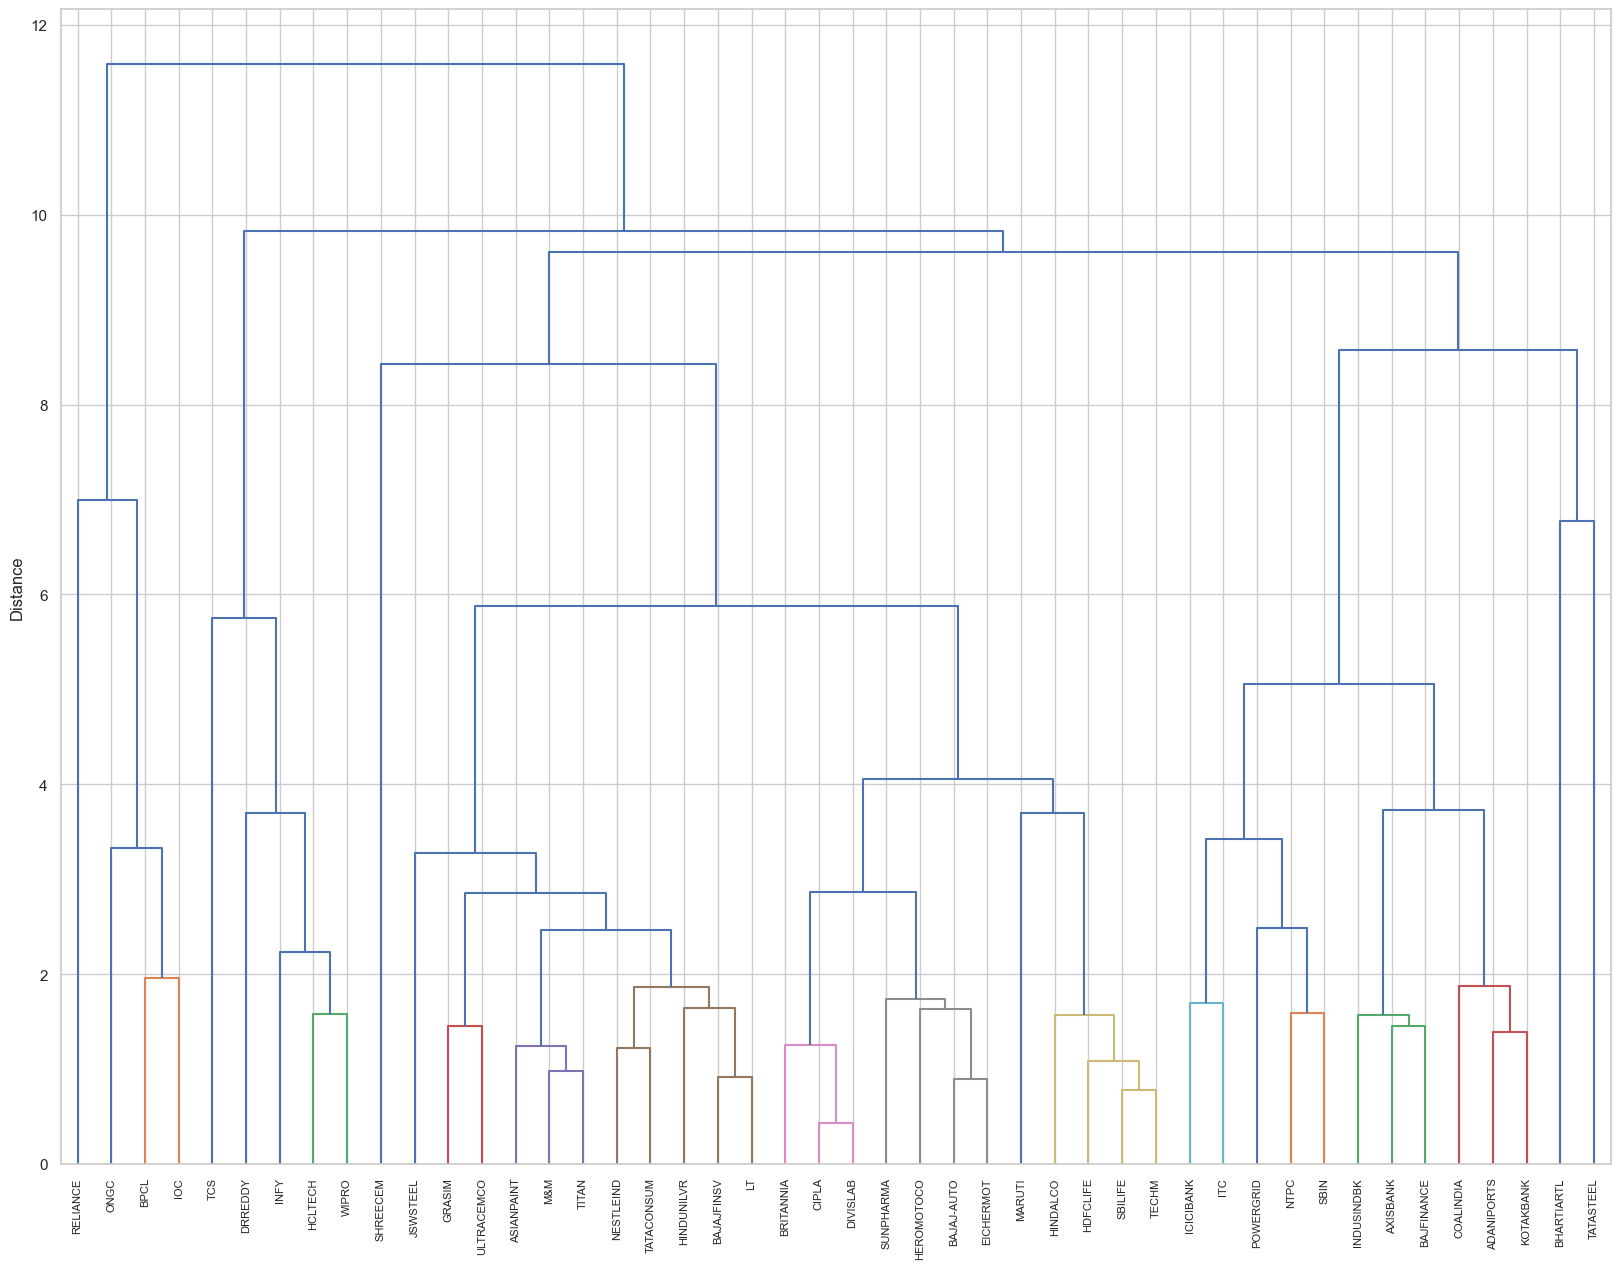

In [24]:
# plotting the dendrogram
fig, ax = plt.subplots(figsize = (20, 15))
sch.dendrogram(z, labels = df_scaled.index, ax = ax, color_threshold = 2)
plt.xticks(rotation = 90)
ax.set_ylabel("Distance")

### Interpreting the Dendrogram
- The companied that are similar to one another are being plotted.
- The leaves of the trees correspond to the records.
- The length of the branch in the tree indicates the degree of dissimialrity between corresponding clusters.
- All the clusterings are made in 8 dimensional space.

### Insights
The usual interpretation is that companies working in the same foeld will have similar trends in stocks and will be clustered together,
- In some cases it is true. For example, INDUSINDBK, AXISBANK, BAJFINANCE are grouped together.
- While TCS, WIPRO, HCLTECH are grouped together only when the number of clusters are very low.

### Performing agglomerative clustering with 5 clusters

In [25]:
from sklearn.cluster import AgglomerativeClustering

model = AgglomerativeClustering(n_clusters = 5, affinity = "euclidean", linkage = "ward")
y_pred = model.fit_predict(df_scaled)
y_pred

array([4, 0, 4, 0, 4, 0, 1, 3, 0, 0, 4, 0, 2, 0, 0, 2, 0, 0, 0, 0, 4, 4,
       1, 4, 2, 0, 4, 0, 0, 0, 4, 0, 1, 4, 1, 0, 0, 4, 0, 2, 0, 3, 0, 0,
       0, 2])

In [26]:
df_viz = df_scaled
df_viz["y_predicted"] = y_pred
df_viz.head()

,marketCap,regularMarketVolume,earningsQuarterlyGrowth,bookValue,totalRevenue,returnOnAssets,profitMargins,earningsGrowth,returns_2020,y_predicted
ADANIPORTS,-0.211408,-0.511335,0.997906,-0.391633,-0.603924,-0.367678,1.642563,1.028220,-0.411864,4
ASIANPAINT,-0.205956,-0.595436,-0.910311,-0.443385,-0.563621,-0.367678,-0.067848,-0.923844,0.045111,0
AXISBANK,-0.066361,0.472895,-0.106571,-0.086132,-0.410034,0.020410,2.363521,-0.119093,-1.352296,4
BAJAJ-AUTO,-0.228895,-0.658760,0.223441,0.444664,-0.498867,-0.367678,0.145054,0.283282,0.159411,0
BAJFINANCE,0.154002,-0.543370,0.109001,0.659356,-0.575321,-0.367678,2.740468,0.057626,-1.063419,4


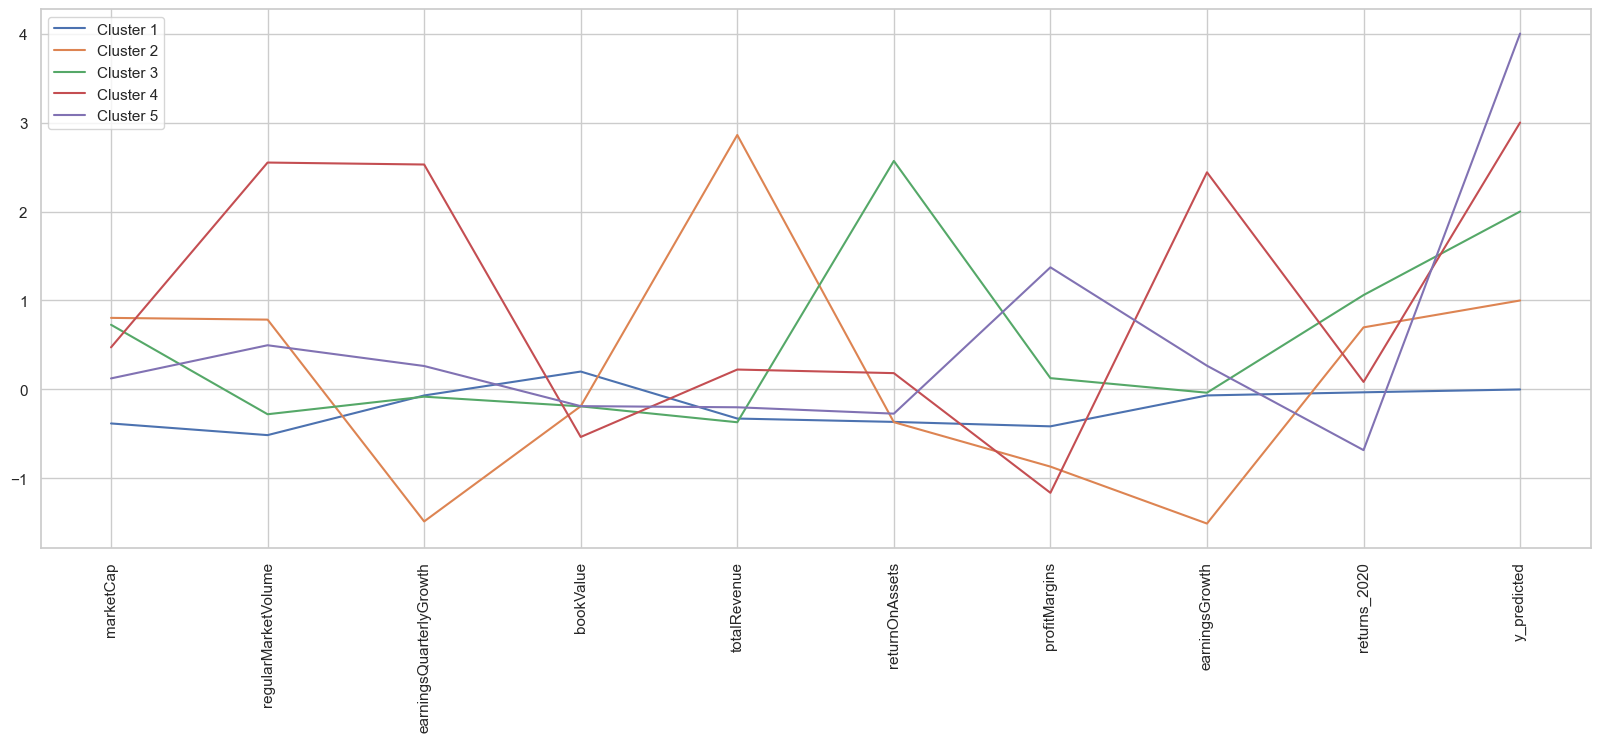

In [27]:
# plotting a line plot to see the characteristics of the clusters
df_scaled["label"] = pd.Series(y_pred, index = df_scaled.index)
df_clustered = df_scaled.groupby("label").mean()

labels = ["Cluster 1", "Cluster 2", "Cluster 3", "Cluster 4", "Cluster 5"]

plt.figure(figsize = (20, 7))
plt.plot(df_clustered.T, label = labels)
plt.xticks(rotation = 90)
plt.legend(labels)

# Deterimining the Number of Clusters using Dendrogram
Deterimining the number of clusters using a dendrogram is a common approach in hierarchical clustering, especially when aiming for a flat partition of the data.
1. Assume the horizontal lines in the dendrogram extend infinitely on both sides, intersecting all vertical lines.
2. Look for the tallest vertical line that does not have any horizontal line crossing it. This line represents the largest jump in distance between merged clusters.
3. Treat uninterrupted horizontal line segments as potential clusters. These segments represent levels in the hierarchy where merging distances become significantly larger.

# Limitations of Agglomerative Clustering
1. With large datasets, agglomerative clustering does not work well.
    - Space Complexity = $O(n)$
    - Time Complexity = $O(n^2)$
2. Unlike K-Means, where WCSS was being minimized, there is no mathematical objective that is being minimized/ maximized in agglomerative clustering.

# Time and Space Complexity of Agglomerative Clustering

### Time complexity
In the worst-case scenario, the time complexity of agglomerative clustering is,

$O(n^3)$

Where,
- n = number of data points.

### Space complexity
The space complexity of agglomerative clustering typically is,

$O(n^2)$

Where,
- n = number of data points.

# Time and Space Complexity of Divisive Clustering

### Time complexity
In the worst-case scenario, the time complexity of divisive clustering is,

$O(n^3 \log{n})$

Where,
- n = number of data points.

### Space complexity
The space complexity of divisive clustering typically is,

$O(n^2)$

Where,
- n = number of data points.